In [1]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from torch import nn # contains all of Pytorch's building blocks for graphs

In [3]:
torch.__version__

'2.1.0+cu121'

## Preparing and loading

In [4]:
weight = 0.3
bias = 0.7

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

In [5]:
X, y

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800],
         [0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.7000],
         [0.7060],
         [

### Splitting and Training Data Sets

In [6]:
train_split = int(0.8*len(X))

In [7]:
len(X), len(y)

(50, 50)

In [8]:
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

In [9]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [10]:
def plot_predictions(train_data = X_train,
                    train_labels = y_train,
                    test_data = X_test,
                    test_labels = y_test,
                    predictions = None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

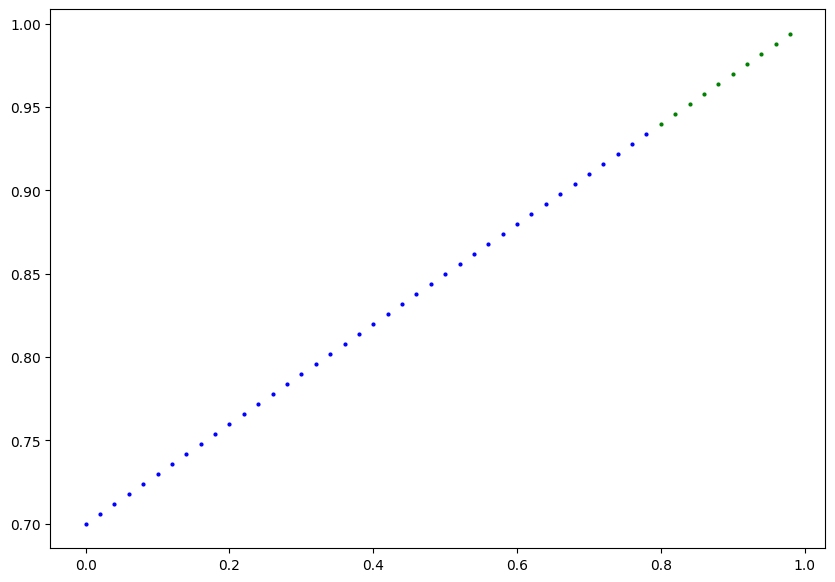

In [11]:
plot_predictions()

## Build model

In [12]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits in nn.Modules
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad = True,
                                            dtype=torch.float))
    ## forward() -> defines the computation of every call
    ## always need to overide the forward() function
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

Essential building models
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - defines what happens in the forward computation

### Checking the contents of our PyTorch model

In [13]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

A state_dict is simply a Python dictionary object that maps each layer to its parameter tensor. It tells what the model contains.

### Making predictions using `torch.inference_mode()`

In [15]:
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

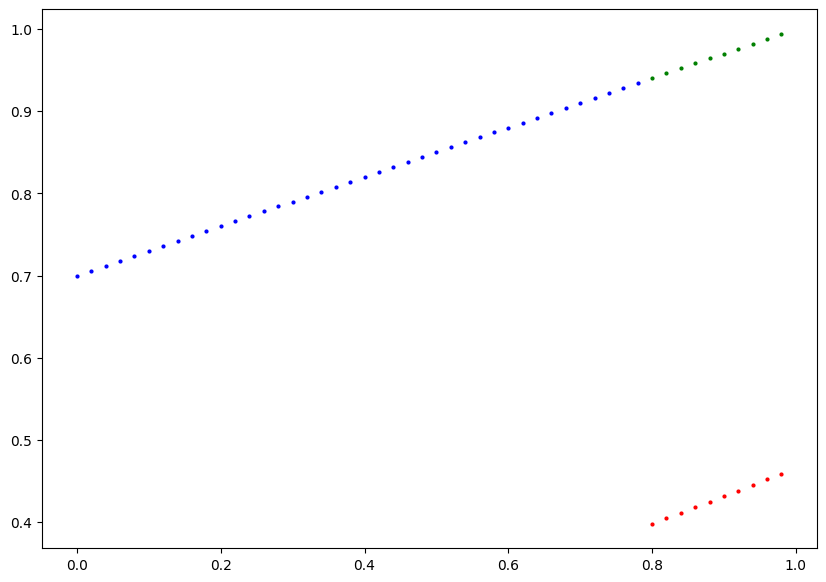

In [16]:
plot_predictions(predictions=y_preds)

Inference mode disables the useful things available of training. Makes the code faster.

In [17]:
y_test - y_preds

tensor([[0.5418],
        [0.5411],
        [0.5404],
        [0.5396],
        [0.5389],
        [0.5382],
        [0.5374],
        [0.5367],
        [0.5360],
        [0.5352]])

### Adding loss function and optimizer

In [18]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01)

### Training loop

In [18]:
epochs = 1000 # number of loops through the data
for epoch in range(epochs):
    model_0.train() # train mode in PyTorch
    y_pred = model_0(X_train) # perform forward pass
    loss = loss_fn(y_pred, y_train) # calculate the loss
    optimizer.zero_grad() # zero out the optimizers para hindi mag-accumulate yung values
    loss.backward() # perform backpropagation
    optimizer.step() # update optimizers

NameError: name 'loss_fn' is not defined

Optimizer: adjusts parameter values through the use of loss values

In [20]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3018])), ('bias', tensor([0.6903]))])

### Testing loop

In [28]:
torch.manual_seed(42)

epoch_count = 1000
train_loss_values = []
test_loss_values = []
epoch_values = []

for epoch in range(epoch_count):
    model_0.train()

    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))
    if epoch%10 == 0:
        epoch_values.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch} | Training loss: {loss} | Test loss : {test_loss}")

Epoch: 0 | Training loss: 0.025997888296842575 | Test loss : 0.05985529348254204
Epoch: 10 | Training loss: 0.02256198786199093 | Test loss : 0.05226977914571762
Epoch: 20 | Training loss: 0.019133061170578003 | Test loss : 0.043997425585985184
Epoch: 30 | Training loss: 0.01569424197077751 | Test loss : 0.03572506457567215
Epoch: 40 | Training loss: 0.012260009534657001 | Test loss : 0.028139550238847733
Epoch: 50 | Training loss: 0.008829416707158089 | Test loss : 0.0198671817779541
Epoch: 60 | Training loss: 0.005390599370002747 | Test loss : 0.011594819836318493
Epoch: 70 | Training loss: 0.0019580244552344084 | Test loss : 0.00400930643081665
Epoch: 80 | Training loss: 0.008988434448838234 | Test loss : 0.00538221001625061
Epoch: 90 | Training loss: 0.008988434448838234 | Test loss : 0.00538221001625061
Epoch: 100 | Training loss: 0.008988434448838234 | Test loss : 0.00538221001625061
Epoch: 110 | Training loss: 0.008988434448838234 | Test loss : 0.00538221001625061
Epoch: 120 | T

In [29]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3018], requires_grad=True),
 Parameter containing:
 tensor([0.6903], requires_grad=True)]

In [30]:
train_loss_values, test_loss_values

([array(0.02599789, dtype=float32),
  array(0.02256199, dtype=float32),
  array(0.01913306, dtype=float32),
  array(0.01569424, dtype=float32),
  array(0.01226001, dtype=float32),
  array(0.00882942, dtype=float32),
  array(0.0053906, dtype=float32),
  array(0.00195802, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=float32),
  array(0.00898843, dtype=flo

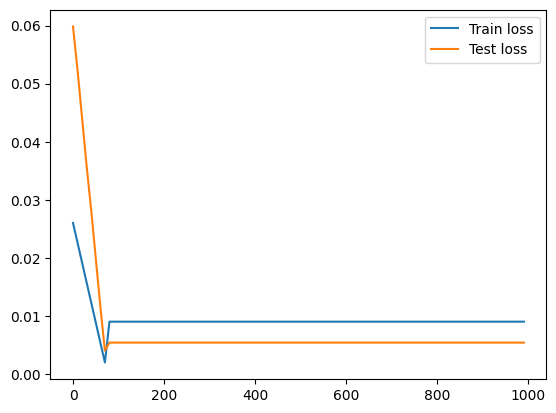

In [31]:
plt.plot(epoch_values, train_loss_values, label="Train loss")
plt.plot(epoch_values, test_loss_values, label="Test loss")
plt.legend()
plt.show()

## Making predictions with a trained PyTorch model

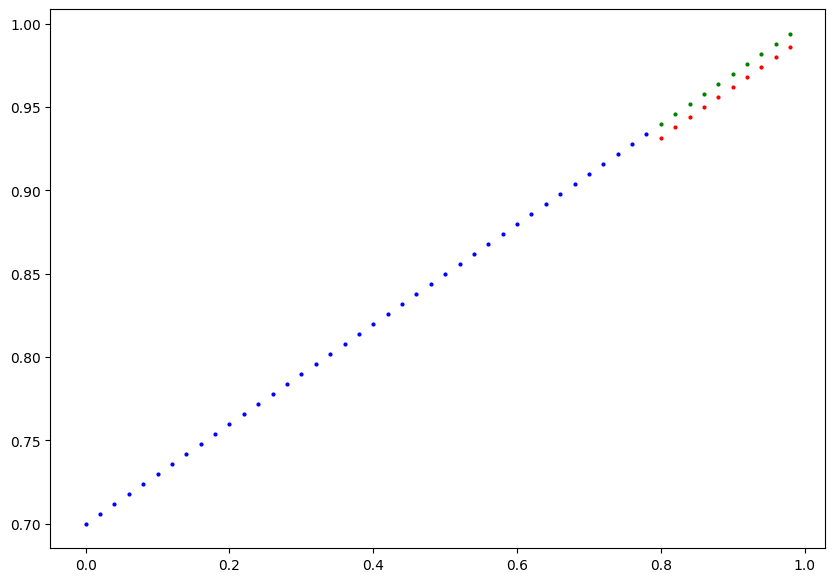

In [32]:
model_0.eval()
with torch.inference_mode():
    y_pred = model_0(X_test)
plot_predictions(predictions=y_pred)

## Saving and loading a PyTorch model

### Saving a PyTorch Model's `state_dict()`

In [33]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

### Loading PyTorch Model

In [35]:
model_1 = LinearRegressionModel()
model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [37]:
model_1.eval()

with torch.inference_mode():
    model_1_preds = model_1(X_test)

In [40]:
y_pred == model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together

In [41]:
import torch
from torch import nn
from matplotlib import pyplot as plt

Make code device-agnostic.

In [42]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [43]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X + bias

In [44]:
train_split = int(0.8*len(X))

In [45]:
X_train, X_test = X[:train_split], X[train_split:]
y_train, y_test = y[:train_split], y[train_split:]

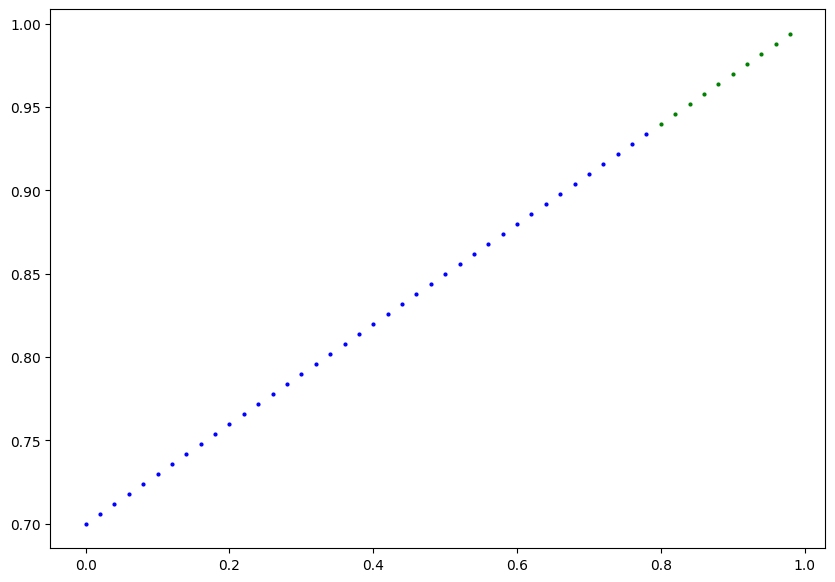

In [46]:
plot_predictions()

In [72]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features = 1, out_features = 1)
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

torch.manual_seed(42)
model_2 = LinearRegressionModelV2()
model_2, model_2.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [73]:
next(model_2.parameters()).device

device(type='cpu')

In [74]:
model_2.to(device)
next(model_2.parameters()).device

device(type='cuda', index=0)

In [75]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
    lr=0.01)

In [76]:
torch.manual_seed(42)
epochs = 1000

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_2.eval()
    with torch.inference_mode():
        y_preds = model_2(X_test)
        test_loss = loss_fn(y_preds, y_test)
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss} | Test Loss: {test_loss}")

Epoch: 0 | Train Loss: 0.5551779866218567 | Test Loss: 0.5739762187004089
Epoch: 10 | Train Loss: 0.439968079328537 | Test Loss: 0.4392664134502411
Epoch: 20 | Train Loss: 0.3247582018375397 | Test Loss: 0.30455657839775085
Epoch: 30 | Train Loss: 0.20954833924770355 | Test Loss: 0.16984669864177704
Epoch: 40 | Train Loss: 0.09433845430612564 | Test Loss: 0.03513690456748009
Epoch: 50 | Train Loss: 0.023886388167738914 | Test Loss: 0.04784907028079033
Epoch: 60 | Train Loss: 0.019956795498728752 | Test Loss: 0.045803118497133255
Epoch: 70 | Train Loss: 0.016517987474799156 | Test Loss: 0.037530567497015
Epoch: 80 | Train Loss: 0.013089174404740334 | Test Loss: 0.02994490973651409
Epoch: 90 | Train Loss: 0.009653178043663502 | Test Loss: 0.02167237363755703
Epoch: 100 | Train Loss: 0.006215683650225401 | Test Loss: 0.014086711220443249
Epoch: 110 | Train Loss: 0.00278724217787385 | Test Loss: 0.005814164876937866
Epoch: 120 | Train Loss: 0.0012645035749301314 | Test Loss: 0.013801801018

In [77]:
model_2.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

In [78]:
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test)
y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

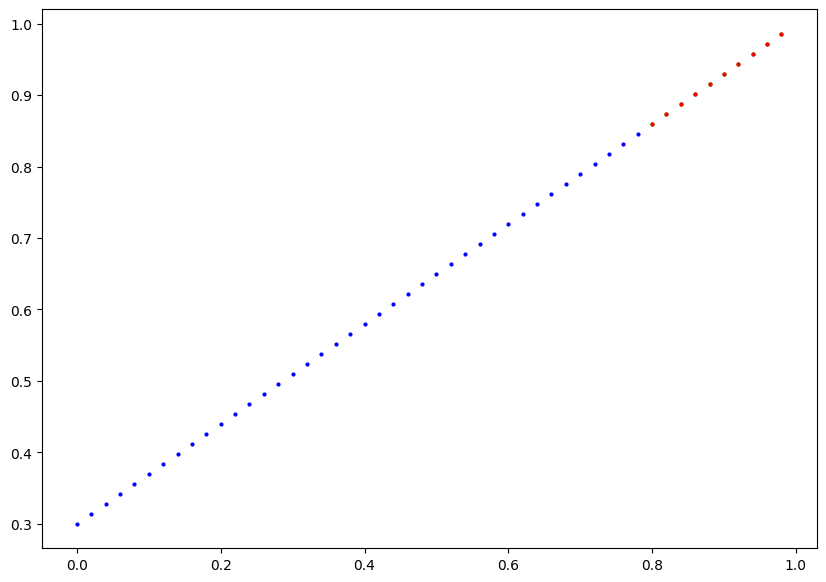

In [81]:
plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data = X_test.cpu(),
                 test_labels = y_test.cpu(),
                 predictions=y_preds.cpu())

## Solve Exercises

Pero review muna.